# Introduction

This workbook is trying to understand what's in the cluster of poor results

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import patsy as pt

# Load data

df = pd.read_csv('results/results_clean_common.csv')

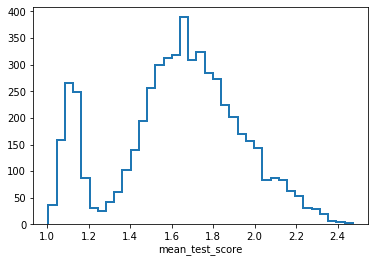

In [8]:
sns.distplot(df['mean_test_score'], kde=False, hist=True, norm_hist=False, 
              hist_kws={'histtype': 'step', 'linewidth': 2, 'alpha': 1})

In [9]:
df.head()

,method,mean_test_score,min_test_score,max_test_score,var_test_score,mean_train_score,min_train_score,max_train_score,var_train_score,basis,lag_time,n_components,n_clusters
0,bayesian,1.365817,1.173453,1.639793,0.024526,2.961204,2.929818,2.996338,0.000734,close_cont,868,7,216
1,bayesian,1.102779,1.068484,1.143216,0.000681,1.986818,1.902030,2.080217,0.003915,chi_tor,123,8,719
2,bayesian,1.599413,1.186124,2.459781,0.196503,2.996799,2.995212,2.999155,0.000002,alpha_angle,528,9,503
3,bayesian,1.921110,1.266772,2.197571,0.119855,2.992483,2.982922,2.997997,0.000026,all_tor,909,6,245
4,bayesian,1.628841,1.490046,1.830204,0.016332,2.992354,2.986086,2.995805,0.000012,ca_cont,250,9,653


In [25]:
df['low'] = 1*(df['mean_test_score'] < 1.3)

In [26]:
y, X = pt.dmatrices("low ~ 0+ C(basis) + lag_time+n_components+n_clusters", df)

In [27]:
y[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [28]:
np.asarray(X)

array([[  0.,   0.,   0., ..., 868.,   7., 216.],
       [  0.,   0.,   0., ..., 123.,   8., 719.],
       [  0.,   1.,   0., ..., 528.,   9., 503.],
       ...,
       [  0.,   0.,   0., ..., 996.,  10., 132.],
       [  0.,   0.,   0., ..., 609.,  10.,  16.],
       [  0.,   0.,   0., ..., 919.,  10., 402.]])

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [46]:
labels =[x.replace('C(basis)[', '') for x in  X.design_info.column_names]
labels = [x.replace(']', '') for x in  labels]
labels

['all_tor',
 'alpha_angle',
 'ca_cont',
 'chi_tor',
 'close_cont',
 'hb_pairs',
 'kappa_angle',
 'lag_time',
 'n_components',
 'n_clusters']

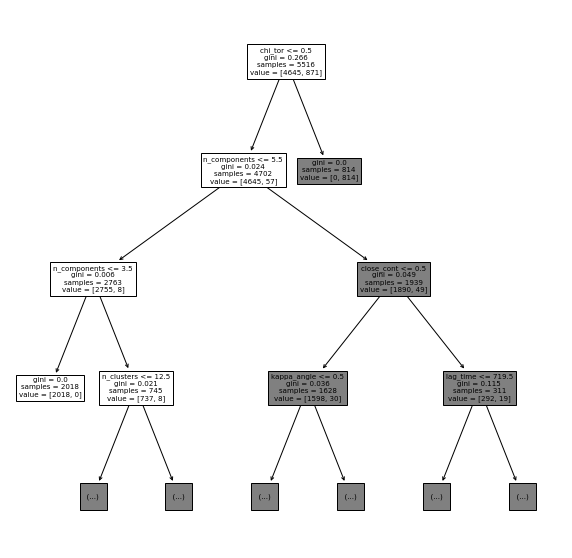

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 10))

_ = tree.plot_tree(clf, ax=ax, feature_names=labels, max_depth=3)

In [51]:
??tree.plot_tree